In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = '/Users/kaylakim/Documents/Algorithms/SupervisedL/Classification/'

In [4]:
# loading the data from csv file to a Panda Dataframe
data = pd.read_csv(path + 'spam.csv', encoding='latin-1')

# printing the first 5 rows of the dataframe
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
source = data['v2']
target = data['v1']

In [8]:
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [9]:
target = target.replace("ham", 0)
target = target.replace("spam", 1)

In [10]:
text_data = np.array(source)
text_data

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [11]:
target_data = np.array(target)
target_data

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [13]:
X = bag_of_words.toarray()

In [14]:
y = np.array(target)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [17]:
y_pred = classifier.predict(X_valid)

In [18]:
classifier.score(X_train, y_train)

0.9939421135292797

In [19]:
classifier.score(X_valid, y_valid)

0.9748878923766816

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)

0.9748878923766816

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred, labels=[0, 1])

array([[946,  19],
       [  9, 141]])

In [26]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.88      0.94      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115



In [28]:
y_proba = classifier.predict_proba(X_valid)

In [29]:
roc_auc_score(y_pred, y_proba[:, 1])

1.0

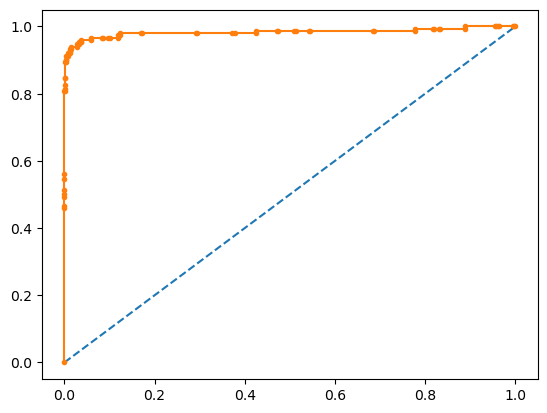

In [30]:
import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, threholds = roc_curve(y_valid, y_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [31]:
import pickle
pkl_file = "pickle_classifier.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(classifier, file)

In [32]:
with open(pkl_file, 'rb') as file:
    pickle_classifier = pickle.load(file)

In [33]:
X_check = np.array(['Dear Ms. Kayla. I will come on time.',
                    'URGENT! We are trying to contact you...'])
X_check = count.transform(X_check)
y_result = pickle_classifier.predict(X_check)
y_result

array([0, 1])